In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

## Task 1

In [2]:
df = pd.read_csv('task-1.csv')

In [273]:
df.head()

,x,y
0,10.529,39.105
1,10.799,40.584
2,11.698,39.883
3,12.851,39.411
4,13.565,40.760


In [274]:
df.shape

(50, 2)

In [3]:
x = df.x.values
y = df.y.values

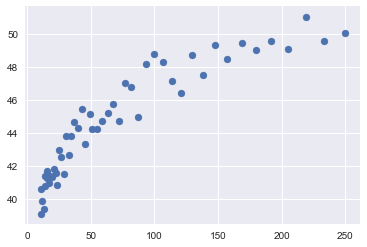

In [4]:
plt.scatter(x,y)
plt.show()

In [5]:
#apply log functions to actual x-values

x_log = np.log(x)
coefs = np.polyfit(x_log,y,deg=1)
a,b = coefs
print('A {:.2f}     B {:.2f}'.format(a, b))

A 3.39     B 31.53


In [279]:
#x and y values for model with 50 data points.
x_values = np.linspace(x.min(),x.max(),num=50)
y_values = np.polyval(coefs,np.log(x_values))

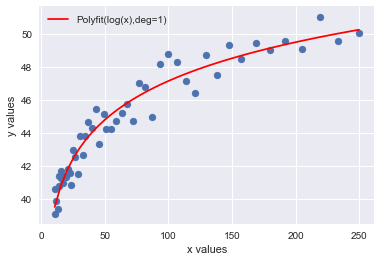

In [281]:
plt.scatter(x,y)
plt.plot(x_values,y_values,label='Polyfit(log(x),deg=1)',c='r')
plt.xlabel('x values')
plt.ylabel('y values')
plt.legend()
plt.show()

In [14]:
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

# RSS of the baseline
rss_baseline = RSS(y, np.mean(y))
print ('RSS baseline:', rss_baseline)

# Compute predictions for each data point
y_pred_rss = np.polyval(coefs,x_log)
rss_model = RSS(y,y_pred_rss)
print ('RSS model:',rss_model)

RSS baseline: 541.14328722
RSS model: 31.8426517528


In [15]:
R2 = 1-(rss_model/rss_baseline)
print ('R2 Coefficient:',R2)

R2 Coefficient: 0.941156709314


#### How does the polyfit function finds the optimal parameters?

It finds the optimal parameters by minimizing the squared errors over a set of data points. This squared error is calculated by getting the sum of the squared error of the residuals. Residuals is referred to the differece between the actual y value and the predicted y value.

#### What are the 2 differences between the polyfit function and the gradient descent?

    1) Gradient descent algorithm is based on MSE calculations, ie Mean Squared Error.
    2) It is an iterative algorithm that takes small steps in the opposite direction, and uses a learning rate to obtain the optimal parameters.

## Task 2

In [81]:
df2 = pd.read_csv('task-2.csv')

In [82]:
df2.head()

,x1,x2,x3,y
0,7.892,318.818,162.970,2112.420
1,8.830,303.180,181.399,2096.231
2,13.811,296.231,145.849,2067.045
3,12.863,325.830,167.996,2269.262
4,13.698,254.035,171.892,1966.604


In [83]:
print ('Shape of dataset:', df2.shape)

Shape of dataset: (1000, 4)


In [85]:
x1 = df2.x1.values
x2 = df2.x2.values
x3 = df2.x3.values
X = df2.drop('y',axis=1).values
y = df2.y.values

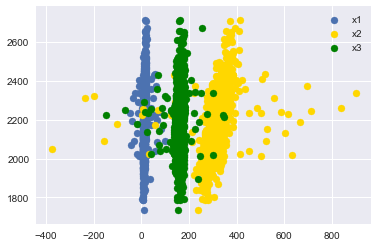

In [27]:
plt.scatter(x1,y,label='x1')
plt.scatter(x2,y,c='gold',label='x2')
plt.scatter(x3,y,c='green',label='x3')
plt.legend()
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=0)

In [41]:
lr = LinearRegression()
lr.fit(X_train,y_train)
print ('Coefficients:', lr.coef_)
print ('Intercept:', lr.intercept_)

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.19641603


In [42]:
from sklearn.metrics import mean_absolute_error as mae

In [261]:
y_test_pred = lr.predict(X_test)
print('Mean Absolute Error on test set: {:.0f}'.format(mae(y_test, y_test_pred)))

Mean Absolute Error on test set: 105


#### Removing outliers from train set

In [121]:
import seaborn as sns
sns.set()

In [215]:
df_train = pd.DataFrame(np.c_[X_train,y_train],columns=['x1','x2','x3','y'])

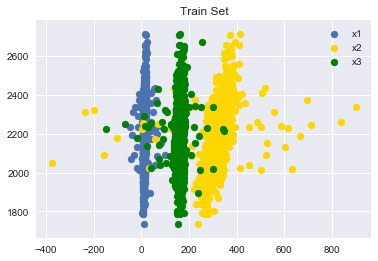

In [240]:
plt.scatter(data=df_train,x=x1,y=y,label='x1')
plt.scatter(data=df_train,x=x2,y=y,c='gold',label='x2')
plt.scatter(data=df_train,x=x3,y=y,c='green',label='x3')
plt.title('Train Set')
plt.legend()
plt.show()

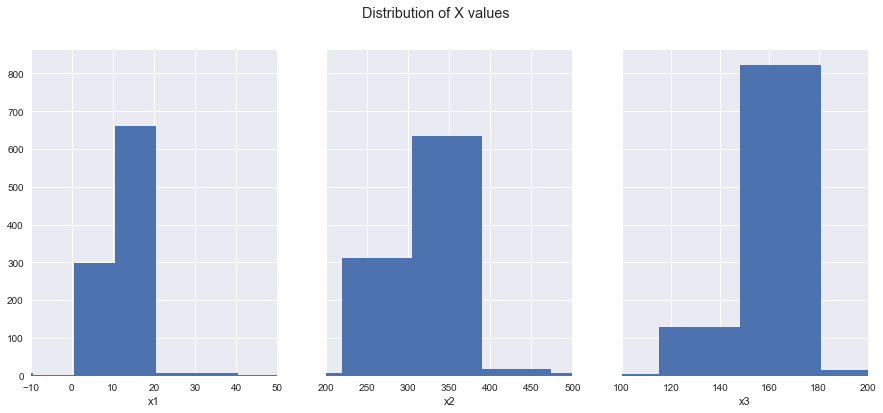

In [241]:
fig, axes = plt.subplots(1, 3,sharey='row',figsize=(15,6))
axes[0].hist(data=df_train,x=x1,bins=15)
axes[0].set_xlabel('x1')
axes[0].set_xlim(-10,50)

axes[1].hist(data=df_train,x=x2,bins=15)
axes[1].set_xlabel('x2')
axes[1].set_xlim(200,500)

axes[2].hist(data=df_train,x=x3,bins=15)
axes[2].set_xlabel('x3')
axes[2].set_xlim(100,200)

fig.suptitle('Distribution of X values',ha='center')
plt.show()

#### Based on the histograms above, here are my selections for selecting 'normal points'

In [248]:
df_train.shape

(800, 4)

In [244]:
x1_tr_norm = df_train.x1.values
x2_tr_norm = df_train.x2.values
x3_tr_norm = df_train.x3.values

In [249]:
#extracting 'normal points'
df_train_norm = df_train[((x1_tr_norm > 0) & (x1_tr_norm < 20)) | ((x2_tr_norm > 210) & (x2_tr_norm < 390)) | 
                ((x3_tr_norm > 110) & (x3_tr_norm < 180))]

In [251]:
df_train_norm.shape

(779, 4)

In [253]:
X_tr_norm = df_train_norm.drop('y',axis=1).values
y_tr_norm = df_train_norm.y.values

In [254]:
lr_tr_norm = LinearRegression()
lr_tr_norm.fit(X_tr_norm,y_tr_norm)
print ('Coefficient:',lr_tr_norm.coef_)
print ('Intercept:',lr_tr_norm.intercept_)

Coefficient: [ 5.03132338  1.04890767 -0.05606839]
Intercept: 1818.7539038


In [285]:
y_test_pred = lr_tr_norm.predict(X_test)
print('Mean Absolute Error on test set w/o outliers: {:.0f}'.format(mae(y_test, y_test_pred)))

Mean Absolute Error on test set w/o outliers: 99


#### Huber Loss with train points with outliers

In [256]:
from sklearn.linear_model import HuberRegressor

In [257]:
hr = HuberRegressor()
hr.fit(X_train,y_train)
print ('Coefficients:', hr.coef_)
print ('Intercept:', hr.intercept_)

Coefficients: [ 11.70103561   2.21157024  -0.3504923 ]
Intercept: 1413.36199078


In [259]:
y_test_hr = hr.predict(X_test)
print('Mean Absolute Error of Huber loss: {:.0f}'.format(mae(y_test, y_test_hr)))

Mean Absolute Error of Huber loss: 84


## Task 3

In [7]:
df3 = pd.read_csv('task-3.csv')

In [402]:
df3.head()

,x,y
0,3.588,0.473
1,3.551,0.784
2,3.610,0.847
3,3.704,0.904
4,3.716,1.118


In [403]:
df3.shape

(50, 2)

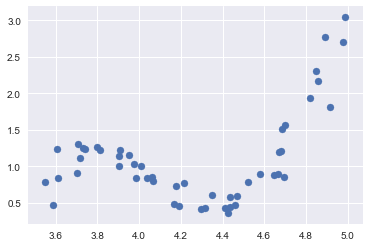

In [404]:
plt.scatter(data=df3,x='x',y='y')
plt.show()

In [8]:
X_3 = df3.x.values
y_3 = df3.y.values

In [406]:
X3_train,X3_test, y3_train, y3_test = train_test_split(X_3, y_3, train_size=0.5,test_size=0.5, random_state=0)

In [407]:
#fit a polynomial of dgerees 10 to train set

from sklearn.preprocessing import PolynomialFeatures

#create polynomial features
poly_obj = PolynomialFeatures(degree=10,include_bias=False)
X_poly = poly_obj.fit_transform(X3_train[:,np.newaxis])

In [408]:
print('Shape:', X_poly.shape)
print('Features:', poly_obj.get_feature_names())

Shape: (25, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


In [409]:
#fit a simple LR using the train set
lr3 = LinearRegression()
lr3.fit(X_poly,y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [412]:
y3_train_pred = lr3.predict(X_poly)
print ('RSS of train set:', RSS(y3_train,y3_train_pred))

X_test_poly = poly_obj.fit_transform(X3_test[:,np.newaxis])
y3_test_pred = lr3.predict(X_test_poly)
print ('RSS on test set:', RSS(y3_test,y3_test_pred))

RSS of train set: 0.684100772235
RSS on test set: 1.5136920211


##### Yes, the model is overfitting as the RSS on train set is lower than the RSS on the test set. Also means that the model failed to generalize to the test data points.

In [413]:
x3_random = np.linspace(min(X_3),max(X_3),num=50)
x3_random_poly = poly_obj.fit_transform(x3_random[:,np.newaxis])
y3_model = lr3.predict(x3_random_poly)

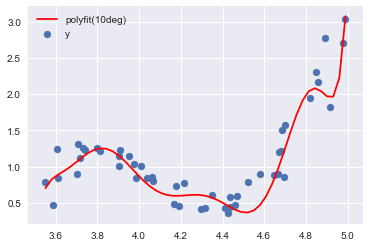

In [414]:
plt.scatter(data=df3,x='x',y='y')
plt.plot(x3_random,y3_model,color='r',label='polyfit(10deg)')
plt.legend()
plt.show()

In [423]:
#regularization with Ridge Regression
from sklearn.linear_model import Ridge

#### tune regularization strength using grid search

In [424]:
#define alphas
alphas = np.logspace(-20,10,num=100)

In [425]:
train_scores = []
test_scores = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_poly,y3_train)
    
    y3_train_pred = ridge.predict(X_poly)
    train_scores.append(RSS(y3_train,y3_train_pred))
    
    y3_test_pred = ridge.predict(X_test_poly)
    test_scores.append(RSS(y3_test,y3_test_pred))

c:\users\zuriati\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.1944239196496363e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\zuriati\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2174312873182189e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\zuriati\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 1.2227441155519403e-18
  ' condition number: {}'.format(rcond), RuntimeWarning)
c:\users\zuriati\anaconda3\lib\site-packages\scipy\linalg\basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix 

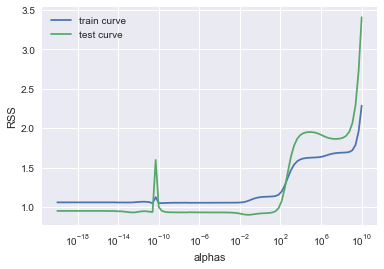

In [426]:
# Plot the validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.xlabel('alphas')
plt.ylabel('RSS')
plt.legend()
plt.show()

Based on the graph, I would say that I want an alpha value where both the scores for test and train curve intersect or have the lowest difference.

In [427]:
diff = []
for (train_score,test_score) in zip(train_scores,test_scores):
    val = (np.abs(train_score - test_score))
    diff.append(val)    

idx = (np.argmin(diff))
best_alpha = alphas[idx]
test = test_scores[idx]
train = train_scores[idx]

print('Best alpha value {:.1e} with test score {:.2f} and train score {:.2f}'.format(best_alpha,test,train))

Best alpha value 2.7e+02 with test score 1.24 and train score 1.27


In [434]:
#with best alpha value
ridge2 = Ridge(alpha=2.7e+02)
ridge2.fit(X_poly,y3_train)

y3_train_pred = ridge2.predict(X_poly)
print ('RSS for train set with tuned ridge model:',RSS(y3_train,y3_train_pred))
    
y3_test_pred = ridge2.predict(X_test_poly)
print ('RSS for test set with tuned ridge model:',RSS(y3_test,y3_test_pred))

RSS for train set with tuned ridge model: 1.2754081322
RSS for test set with tuned ridge model: 1.24323297825


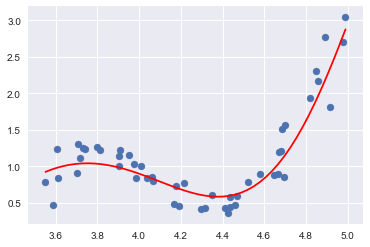

In [435]:
x3_random = np.linspace(min(X_3),max(X_3),num=50)
x3_random_poly = poly_obj.fit_transform(x3_random[:,np.newaxis])
y3_model = ridge2.predict(x3_random_poly)

plt.scatter(data=df3,x='x',y='y')
plt.plot(x3_random,y3_model,c='r')
plt.show()